# Exercises 3, answers

In [2]:
def objective_function(x):
    return (x[0]**2.0 + x[1]**2.0 + x[0] + 2.0 * x[1])

## Excercise 1

In [3]:
import math
def golden_section_line_search(a,b,f,L):
    x = a
    y = b
    while y-x>2*L:
        if f(x+(math.sqrt(5.0)-1)/2.0*(y-x))<f(y-(math.sqrt(5.0)-1)/2.0*(y-x)):
            x = y-(math.sqrt(5.0)-1)/2.0*(y-x)
        else:
            y = x+(math.sqrt(5.0)-1)/2.0*(y-x)
    return (x+y)/2

In [24]:
import numpy as np
import ad
def steepest_descent_withgolden(f,start,search_interval_length,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
    while np.linalg.norm(d)>precision:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x))
        step = golden_section_line_search(0,
                                          search_interval_length/np.linalg.norm(d),
                                          lambda t: f(x+t*d),
                                          precision)
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [25]:
(x,f_new,steps1) = steepest_descent_withgolden(objective_function,
                                               [0,0],3,0.0001)
print (x)

[-0.5        -0.99999999]


## Exercise 2

In [27]:
import numpy as np
import ad
def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    d = float('Inf')
    while np.linalg.norm(d)>precision and len(steps)<10:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x))
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [28]:
(x,f_new,steps2) = steepest_descent(objective_function,[0,0],3,0.00001)

In [35]:
import matplotlib.pyplot as plt

def plot_2d_steps2(steps1,start1,steps2,start2):
    myvec1 = np.array([start1]+steps1).transpose()
    myvec2 = np.array([start2]+steps2).transpose()
    plt.plot(myvec1[0,],myvec1[1,],'ro')
    plt.plot(myvec2[0,],myvec2[1,],'bo')    
    return plt

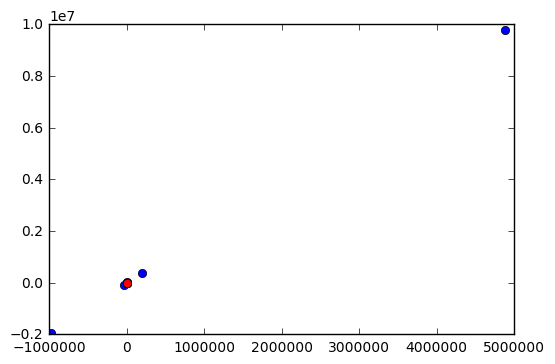

In [34]:
plot_2d_steps2(steps1,[5,5],steps2,[0,0]).show()

## Exercise 3

$$y_k=\nabla f(x_k+s_k)-\nabla f(x_k),$$

$$H_{k+1}=H_{k}-\frac{H_k y_k y_k^T H_k}{y_k^T H_k y_k}+\frac{s_k s_k^T}{y_k^{T} s_k}$$

In [11]:
import ad
import numpy as np
def update_Hinv(H_inv_old,x_old,x_new,f):
    y = np.matrix(ad.gh(f)[0](x_new)-ad.gh(f)[0](x_old)).transpose()
    second_term = H_inv_old*y*y.transpose()*H_inv_old.transpose()/(y.transpose()*H_inv_old*y)
    s = np.matrix(x_new-x_old).transpose()
    third_term = s*s.transpose()/(y.transpose()*s)
    H_inv_new = H_inv_old-second_term+third_term
    return H_inv_new

In [12]:
import numpy as np
def quasi_newton_DFP(f,start,step,precision):
    f_old = float('Inf')
    x_old = np.array([0]*len(start))
    x_new = np.array(start)
    steps = []
    f_new = f(x_new)
    H_inv = np.eye(len(start))
    while abs(f_old-f_new)>precision:
        H_inv = update_Hinv(H_inv,x_old,x_new,f)
        f_old = f_new
        d = (-H_inv*(np.matrix(ad.gh(f)[0](x_new)).transpose())).transpose()
        #Change the type from np.matrix to np.array so that we can use it in our function
        x_old = x_new
        x_new = np.array(x_new+d*step)[0]
        f_new = f(x_new)
        steps.append(list(x_new))
    return x_new,f_new,steps

In [14]:
(x,f_new,steps)=quasi_newton_DFP(objective_function,[5,5],0.5,0.0001)
print (steps, len(steps))

[[2.375, 1.875], [0.80465903095859459, 0.54908641399478042], [0.25491152974819342, -0.34694943128122824], [-0.22138146233145151, -0.61283482163494774], [-0.3363702062401781, -0.84998390979030725], [-0.42867873325120626, -0.91990380820563544], [-0.46299726205011665, -0.96172375588272196], [-0.48183270669379308, -0.98058772682221051], [-0.49085618915925078, -0.99035393661783189], [-0.49544040694814184, -0.99516559230494495], [-0.49771780964871548, -0.99758507682621378]] 11
